In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm

import pandas as pd
import numpy as np

In [3]:
def doplot(plotWhat, title, footnote):
    
    fig, ax = plt.subplots(figsize=(20, 15))

    cmap = plt.get_cmap('Oranges', 10)   

    pc = PatchCollection(dfPoly.shapes, zorder=2)
    #norm = Normalize()
    #norm = Normalize(vmin = 0, vmax = 100)
    norm = BoundaryNorm(np.linspace(0,100,11), 10)

    pc.set_facecolor(cmap(norm(dfPoly[plotWhat].fillna(0).values)))
    ax.add_collection(pc)

    mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
    mapper.set_array(dfPoly[plotWhat])

    #m.drawmapboundary(fill_color = '#46bcec')
    m.fillcontinents(color='#f2f2f2', lake_color = '#46bcec')
    m.drawcountries()
    m.drawrivers(color = '#46bcec')

    plt.colorbar(mapper, shrink=0.4)
    plt.title(title, fontsize = 25)
    plt.figtext(0.13, 0.14, footnote, ha='left', va='baseline')

    fig.savefig(plotWhat, bbox_inches='tight')
    plt.close(fig)

def prepCsv(ending, base, profession = False):
    file = '/home/ram22/dataDrive/dataProjects/povMap/zambiaLFSmapping/3_csvOutput/censuswardlabor' + ending + '.csv'
    db = pd.read_csv(file)
    db.rename(columns={'popthiscase': 'pop' + ending.title(), 
                       'lf12months': 'lf12m' + ending.title(), 
                       'empl12months': 'empl12m' + ending.title()},
              inplace = True)
    db.drop(['dist', 'const', 'ward', 'population1564', 'lf7days', 'empl7days', 'unem7days', 'unem12months'], 
              axis = 1, inplace = True)
    if profession == True:
        db.drop(['pop' + ending.title(), 'lf12m' + ending.title(),], axis = 1, inplace = True)
    
    base = base.merge(db, on = 'wardid', how = 'outer', indicator = True)
    print(base._merge.value_counts())
    base.drop('_merge', axis = 1, inplace = True)
    
    return base

def prepCsvRegion(region, ending, base, profession = False):
    file = '/home/ram22/dataDrive/dataProjects/povMap/zambiaLFSmapping/3_csvOutput/censusward' + region + 'labor' + ending + '.csv'
    db = pd.read_csv(file)
    db.rename(columns={'popthiscase' : 'pop' + region.title() + ending.title(), 
                       'lf12months' : 'lf12m' + region.title() + ending.title(), 
                       'empl12months' : 'empl12m' + region.title() + ending.title()},
              inplace = True)
    db.drop(['dist', 'const', 'ward', 'region', 'wardregionid', 'population1564', 'lf7days', 'empl7days', 'unem7days', 'unem12months'], 
              axis = 1, inplace = True)
    if profession == True:
        db.drop(['pop' + region.title() + ending.title(), 'lf12m' + region.title() + ending.title(),], axis = 1, inplace = True)
    
    base = base.merge(db, on = 'wardid', how = 'outer', indicator = True)
    print(base._merge.value_counts())
    base.drop('_merge', axis = 1, inplace = True)
    
    return base


(1421,
 5,
 [21.998040874782703, -18.075163999950632, 0.0, 0.0],
 [33.708576224001774, -8.224359999937205, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x7fa123c22cc0>)

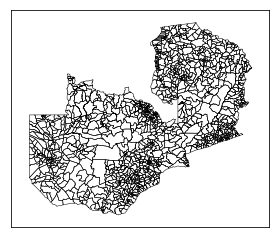

In [4]:
# Prepare basemap and load ward borders into it
m = Basemap(resolution = 'h', # c, l, i, h, f or None
           projection = 'merc',
           lat_0 = 27.80, lon_0 = -13.20,
           llcrnrlon = 21.01, llcrnrlat = -18.69, urcrnrlon = 34.61, urcrnrlat = -7.56)

m.readshapefile('/home/ram22/dataDrive/dataProjects/povMap/zambiaLFSmapping/0_originalData/Zambia/administrative_shapefiles/ward/WardShapefiles11June2014/Final_edits_Zambia_Wards_2014t', 
                'wards')

In [47]:
# Load csv files with data. Use this to rename and merge as needed
laborAll = pd.read_csv('/home/ram22/dataDrive/dataProjects/povMap/zambiaLFSmapping/3_csvOutput/censuswardlabor1564.csv')
laborAll.rename(columns={'popthiscase' : 'pop1564',
                        'lf12months' : 'lf12m1564',
                        'empl12months' : 'empl12m1564'}, 
                inplace = True)
laborAll.drop(['dist', 'const', 'ward', 'population1564', 'lf7days', 'empl7days', 'unem7days', 'unem12months'], 
              axis = 1, inplace = True)

laborAll = prepCsv('1524', laborAll)
laborAll = prepCsv('2564', laborAll)
laborAll = prepCsv('male1564', laborAll)
laborAll = prepCsv('female1564', laborAll)
laborAll = prepCsv('agriculture1564', laborAll, profession = True)
laborAll = prepCsv('manufacture1564', laborAll, profession = True)
laborAll = prepCsv('otherindustry1564', laborAll, profession = True)
laborAll = prepCsv('mining1564', laborAll, profession = True)
laborAll = prepCsv('semiskilled1564', laborAll)
laborAll = prepCsv('unskilled1564', laborAll)
laborAll = prepCsv('skilled1564', laborAll)

laborAll = prepCsvRegion('urban', '1564', laborAll)
laborAll = prepCsvRegion('rural', '1564', laborAll)

laborAll.fillna(0, inplace = True)

laborAll.head()

both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
both          1421
right_only       0
left_only        0
Name: _merge, dtype: int64
left_only     1051
both           370
right_only       0
Name: _merge, dtype

,wardid,pop1564,lf12m1564,empl12m1564,pop1524,lf12m1524,empl12m1524,pop2564,lf12m2564,empl12m2564,...,empl12mUnskilled1564,popSkilled1564,lf12mSkilled1564,empl12mSkilled1564,popUrban1564,lf12mUrban1564,empl12mUrban1564,popRural1564,lf12mRural1564,empl12mRural1564
0,10100101,7894,4785,4525,3284,1287,1182.0,4610,3498,3343,...,1173.0,231.0,206.0,198.0,0.0,0.0,0.0,7894.0,4785.0,4525.0
1,10100102,3308,1390,1209,1422,348,269.0,1886,1042,940,...,260.0,173.0,122.0,105.0,0.0,0.0,0.0,3308.0,1390.0,1209.0
2,10100103,7371,4396,4305,3124,1193,1156.0,4247,3203,3149,...,1332.0,171.0,161.0,160.0,0.0,0.0,0.0,7371.0,4396.0,4305.0
3,10100104,10603,6022,5751,4458,1579,1463.0,6145,4443,4288,...,1791.0,463.0,407.0,390.0,0.0,0.0,0.0,10603.0,6022.0,5751.0
4,10100105,11796,6069,5497,4632,1480,1232.0,7164,4589,4265,...,1291.0,524.0,470.0,446.0,1434.0,546.0,326.0,10362.0,5523.0,5171.0


In [63]:
#Create indicators
dataFile = laborAll
dataFile['lfRate12m'] = round(dataFile.lf12m1564 / dataFile.pop1564 * 100, 2)
dataFile['emplRate12m'] = round(dataFile.empl12m1564 / dataFile.lf12m1564 * 100, 2)
dataFile['pop1524Rate'] = round(dataFile.pop1524 / dataFile.pop1564 * 100, 2)
dataFile['rate1524Empl'] = round(dataFile.empl12m1524 / dataFile.pop1524 * 100, 2)
dataFile['pop2564Rate'] = round(dataFile.pop2564 / dataFile.pop1564 * 100, 2)
dataFile['rate2564Empl'] = round(dataFile.empl12m2564 / dataFile.pop2564 * 100, 2)
dataFile['popMaleRate'] = round(dataFile.popMale1564 / dataFile.pop1564 * 100, 2)
dataFile['rateMaleEmpl'] = round(dataFile.empl12mMale1564 / dataFile.popMale1564 * 100, 2)
dataFile['popFemaleRate'] = round(dataFile.popFemale1564 / dataFile.pop1564 * 100, 2)
dataFile['rateFemaleEmpl'] = round(dataFile.empl12mFemale1564 / dataFile.popFemale1564 * 100, 2)
dataFile['indAgricultureAsEmpl'] = round(dataFile.empl12mAgriculture1564 / dataFile.empl12m1564 * 100, 2)
dataFile['indManufactureAsEmpl'] = round(dataFile.empl12mManufacture1564 / dataFile.empl12m1564 * 100, 2)
dataFile['indMiningAsEmpl'] = round(dataFile.empl12mMining1564 / dataFile.empl12m1564 * 100, 2)
dataFile['indOtherAsEmpl'] = round(dataFile.empl12mOtherindustry1564 / dataFile.empl12m1564 * 100, 2)

dataFile['popSemiskilledRate'] = round(dataFile.popSemiskilled1564 / dataFile.pop1564 * 100, 2)
dataFile['rateSemiskilledEmpl'] = round(dataFile.empl12mSemiskilled1564 / dataFile.popSemiskilled1564 * 100, 2)
dataFile['popUnskilledRate'] = round(dataFile.popUnskilled1564 / dataFile.pop1564 * 100, 2)
dataFile['rateUnskilledEmpl'] = round(dataFile.empl12mUnskilled1564 / dataFile.popUnskilled1564 * 100, 2)
dataFile['popSkilledRate'] = round(dataFile.popSkilled1564 / dataFile.pop1564 * 100, 2)
dataFile['rateSkilledEmpl'] = round(dataFile.empl12mSkilled1564 / dataFile.popSkilled1564 * 100, 2)

dataFile['popUrbanRate'] = round(dataFile.popUrban1564 / dataFile.pop1564 * 100, 2)
dataFile['lfUrbanRate12m'] = round(dataFile.lf12mUrban1564 / dataFile.popUrban1564 * 100, 2)
dataFile['regUrbanLf12m'] = round(dataFile.lf12mUrban1564 / dataFile.lf12m1564 * 100, 2)
dataFile['emplUrbanRate12m'] = round(dataFile.empl12mUrban1564 / dataFile.lf12mUrban1564 * 100, 2)

dataFile['popRuralRate'] = round(dataFile.popRural1564 / dataFile.pop1564 * 100, 2)
dataFile['lfRuralRate12m'] = round(dataFile.lf12mRural1564 / dataFile.popRural1564 * 100, 2)
dataFile['regRuralLf12m'] = round(dataFile.lf12mRural1564 / dataFile.lf12m1564 * 100, 2)
dataFile['emplRuralRate12m'] = round(dataFile.empl12mRural1564 / dataFile.lf12mRural1564 * 100, 2)


In [64]:
dataFile.head()

,wardid,pop1564,lf12m1564,empl12m1564,pop1524,lf12m1524,empl12m1524,pop2564,lf12m2564,empl12m2564,...,popSkilledRate,rateSkilledEmpl,popUrbanRate,regUrbanLf12m,emplUrbanRate12m,popRuralRate,regRuralLf12m,emplRuralRate12m,lfUrbanRate12m,lfRuralRate12m
0,10100101,7894,4785,4525,3284,1287,1182.0,4610,3498,3343,...,2.93,85.71,0.00,0.0,NaN,100.00,100.0,94.57,NaN,60.62
1,10100102,3308,1390,1209,1422,348,269.0,1886,1042,940,...,5.23,60.69,0.00,0.0,NaN,100.00,100.0,86.98,NaN,42.02
2,10100103,7371,4396,4305,3124,1193,1156.0,4247,3203,3149,...,2.32,93.57,0.00,0.0,NaN,100.00,100.0,97.93,NaN,59.64
3,10100104,10603,6022,5751,4458,1579,1463.0,6145,4443,4288,...,4.37,84.23,0.00,0.0,NaN,100.00,100.0,95.50,NaN,56.80
4,10100105,11796,6069,5497,4632,1480,1232.0,7164,4589,4265,...,4.44,85.11,12.16,9.0,59.71,87.84,91.0,93.63,38.08,53.30


In [65]:
dfPoly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), closed=True) for shape in m.wards],
        'wardid': [int(ward['ID']) for ward in m.wards_info]
    })
dfPoly = dfPoly.merge(dataFile, on = 'wardid', how = 'outer', indicator = True)

In [66]:
doplot('lfRate12m', 'Labor force participation (12 months)', 'Note: Labor force over total 15-64 population')
doplot('emplRate12m', 'Employment rate (12 months)', 'Note: Employed over total labor force (15-64)')
doplot('pop1524Rate', 'Youth (15-24) as percentage of population', 'Note: 15 - 24 year olds over total 15 - 64 population')
doplot('rate1524Empl', 'Rate of youth employed (15-24)', 'Note: employed 15 - 24 year olds over 15 - 24 population')
doplot('pop2564Rate', 'Adult (25-64) as percentage of population', 'Note: 25 - 64 year olds over total 15 - 64 population')
doplot('rate2564Empl', 'Rate of adults employed (25-64)', 'Note: employed 25 - 64 year olds over 25 - 64 population')
doplot('indAgricultureAsEmpl', 'Rate of employed workers who are in agriculture (15 - 64)', 'Note: employed in agriculture over all employed')
doplot('indManufactureAsEmpl', 'Rate of employed workers who are in manufacture', 'Note: employed in agriculture over all employed')
doplot('indMiningAsEmpl', 'Rate of employed workers who are in mining', 'Note: employed in minig over all employed')
doplot('indOtherAsEmpl', 'Rate of employed workers who are in other industry', 'Note: employed in manufacture over all employed')
doplot('popMaleRate', 'Males as percentage of population', 'Note: 15 - 64 males overl all 15 - 64 population')
doplot('rateMaleEmpl', 'Rate of males employed', 'Note: 15 - 64 employed males over all 15 - 64 male population')
doplot('popFemaleRate', 'Females as percentage of population', 'Note: 15 - 64 females overl all 15 - 64 population')
doplot('rateFemaleEmpl', 'Rate of female employed', 'Note: 15 - 64 employed females over all 15 - 64 female population')
doplot('popSemiskilledRate', 'Semiskilled as percentage of population', 'Note: 15 - 64 semi-skilled population over all 15 - 64 population')
doplot('rateSemiskilledEmpl', 'Rate of semiskilled employed', 'Note: Rate of employed 15 - 64 semi-skilled workers over all semi-skilled 15 - 64 population')
doplot('popUnskilledRate', 'Unskilled as percentage of population', 'Note: 15 - 64 unskilled population over all 15 - 64 population')
doplot('rateUnskilledEmpl', 'Rate of unskilled employed', 'Note: Rate of employed 15 - 64 unskilled workers over all unskilled 15 - 64 population')
doplot('popSkilledRate', 'Skilled as percentage of population', 'Note: 15 - 64 skilled population over all 15 - 64 population')
doplot('rateSkilledEmpl', 'Rate of skilled employed', 'Note: Rate of employed 15 - 64 skilled workers over all skilled 15 - 64 population')


/home/ram22/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


In [67]:
doplot('popUrbanRate', 'Urban population (15 - 64)', 'Note: 15 - 64 urban population over all 15 - 64 population')
doplot('lfUrbanRate12m', 'Urban labor force (15 - 64)', 'Note: urban labor force over all 15 - 64 urban population')
doplot('regUrbanLf12m', 'Rate of labor force that is urban (15 - 64)', 'Note: urban labor force over all 15 - 64 labor force')
doplot('emplUrbanRate12m', 'Urban employment (15 - 64)', 'Note: urban employed over urban labor force')


/home/ram22/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


In [68]:
doplot('popRuralRate', 'Rural population (15 - 64)', 'Note: 15 - 64 rural population over all 15 - 64 population')
doplot('lfRuralRate12m', 'Rural labor force (15 - 64)', 'Note: rural labor force over all 15 - 64 rural population')
doplot('regRuralLf12m', 'Rate of labor force that is rural (15 - 64)', 'Note: rural labor force over all 15 - 64 labor force')
doplot('emplRuralRate12m', 'Rural employment (15 - 64)', 'Note: rural employed over rural labor force')


/home/ram22/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
